# Bitcoin and DXY Analysis

This project aims to analyze the relationship between Bitcoin prices (PriceUSD) and the US Dollar Index (DXY) over time. 

The hypothesis is that since BTC is backed by USD, it is significantly affected by the performance of DXY. 

I am using LOESS (Locally Estimated Scatterplot Smoothing) to visualize trends and their derivatives, providing insights into market behaviors during different periods.

## Project Overview

The primary focus of this project is to visualize and analyze the correlation between Bitcoin prices and DXY. The following key elements are included:

1. **Data Collection**: Downloading historical data for Bitcoin and DXY.
2. **Data Smoothing**: Applying LOESS smoothing to both datasets to highlight trends.
3. **Trend Analysis**: Calculating and plotting the derivative of the LOESS curves to identify periods of upward and downward trends.
4. **Highlighting Significant Periods**: Using color coding to differentiate between bull and bear markets:
   - **Red**: Downtrend periods (Price down, DXY up).
   - **Green**: Bull market periods (Price up, DXY down).
   - **Orange**: Initial bull market periods (Price up, DXY sideways).

## Visualization

The project generates a comprehensive plot that includes:
- Bitcoin prices on a logarithmic scale.
- DXY values on a secondary y-axis.
- Colored spans to highlight different market trends and periods.
- Annotated text to explain the trend behavior during each period.

## Conclusions

The analysis demonstrates that:

1. During downtrend phases (diminishing price), DXY increases.
2. In initial bull phases (rising price), DXY moves sideways.
3. During final bull phases (rising price), DXY decreases.

The initial hypothesis has been confirmed by the analysis.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append("/Users/danieleraimondi/bitcoin_datascience/functions")
from functions_DXY import load_dxy_data, load_btc_data, plot_models, add_loess


# Load data
dxy = load_dxy_data()
btc = load_btc_data()
df = btc.join(dxy, how="inner")

# LOESS addition
df["PriceUSD_LOESS"] = add_loess(df, "PriceUSD")
df["DXY_LOESS"] = add_loess(df, "DXY")

[*********************100%%**********************]  1 of 1 completed

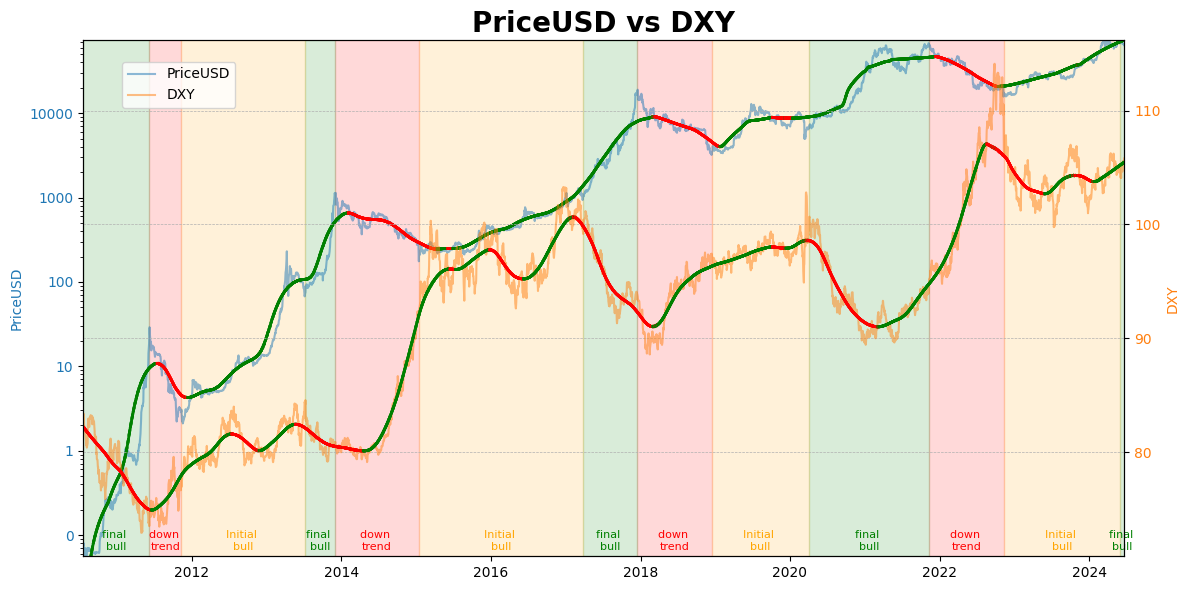

In [2]:
# Dates definitions
tops_dates = pd.to_datetime(["2011-06-08", "2013-11-30", "2017-12-17", "2021-11-10", pd.to_datetime("today")])
bottoms_dates = pd.to_datetime(["2011-11-11", "2015-01-14", "2018-12-15", "2022-11-12"])
startbull_dates = pd.to_datetime(["2010-07-19", "2013-07-05", "2017-03-25", "2020-04-01", "2024-06-01"])

# Plot
plot_models(df, tops_dates, bottoms_dates, startbull_dates)